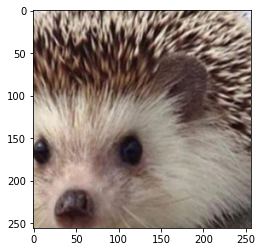

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import cv2
transform = transforms.Compose([
    #transforms.Resize(64),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.1),
    transforms.RandomResizedCrop(256, scale=(0.7, 0.7), ratio=(1.0, 1.0)),
    #transforms.Normalize((0.1307,), (0.3081,))
])

img = cv2.imread('image/img.jpg')

plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = Image.fromarray(img_rgb)
trans_img = transform(img)

plt.imshow(trans_img)
    
plt.show()

imgaug

/Users/caujoeng/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/imgaug/imgaug.py:184: DeprecationWarning: Function `ContrastNormalization()` is deprecated. Use `imgaug.contrast.LinearContrast` instead.
  warn_deprecated(msg, stacklevel=3)


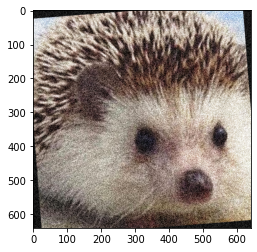

In [42]:
import cv2
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import matplotlib.pyplot as plt

#imgaug test
seq = iaa.Sequential([
    iaa.GaussianBlur(sigma=iap.Uniform(0.0, 1.0)),
    iaa.ContrastNormalization(iap.Choice([1.0, 1.5, 3.0], p=[0.5, 0.3, 0.2])),
    iaa.Affine(rotate=iap.Normal(0.0, 30), translate_px=iap.RandomSign(iap.Poisson(3))),
    iaa.AddElementwise(iap.Discretize((iap.Beta(0.5, 0.5) * 2 - 1.0) * 64)),
    iaa.Multiply(iap.Positive(iap.Normal(0.0, 0.1)) + 1.0)
])
 
imglist=[]
img = cv2.imread('image/img.jpg')
img2 = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
imglist.append(img2)
images_aug = seq.augment_images(imglist)
plt.imshow(images_aug[0])
plt.show()

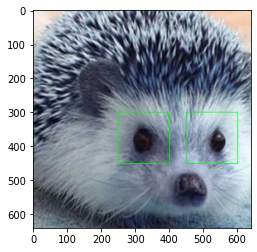

In [34]:
import cv2
import imageio
import imgaug as ia
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import matplotlib.pyplot as plt

image = cv2.imread('image/img.jpg')

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=250, x2=400, y1=300, y2=450),
    BoundingBox(x1=450, x2=600, y1=300, y2=450),
], shape=image.shape)

plt.imshow(bbs.draw_on_image(image, size=2))
plt.show()

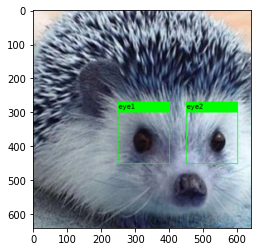

In [36]:
import cv2
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import matplotlib.pyplot as plt

image = cv2.imread('image/img.jpg')

bbs = BoundingBoxesOnImage([
    BoundingBox(x1=250, x2=400, y1=300, y2=450),
    BoundingBox(x1=450, x2=600, y1=300, y2=450),
], shape=image.shape)

bbs_labeled = bbs.deepcopy()
bbs_labeled[0].label = "eye1"
bbs_labeled[1].label = "eye2"

image_bbs = bbs_labeled.draw_on_image(image, size=2)

plt.imshow(bbs.draw_on_image(image_bbs, size=2))
plt.show()

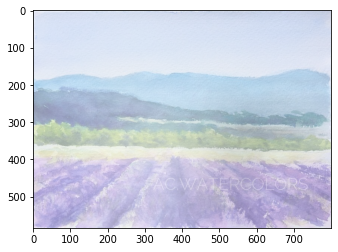

In [49]:
import imgaug.augmenters as iaa

imglist=[]
img = cv2.imread('image/img2.jpg')
img2 = cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
imglist.append(img2)

seq = iaa.Sequential([
    iaa.Rain()
])

images_aug = seq.augment_images(imglist)
plt.imshow(images_aug[0])
plt.show()
